In [4]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from ipywidgets import FloatSlider
import scipy

# GX 01
You are given the complex field `01_unknown.npy`. Load the complex array with `np.load("01_unknown.npy")`.
The wavelength is 633nm and the physical pixel size of the image is 1µm.


## Tasks
### 1
What is the correct negative propagation (backwards) distance to obtain a sharp, meaningful image?


### 2 Bonus
What happens if you scale the pixel size and the propagation distance by a factor of 10. Does it still work? Try it out and explain what happens.
What would you need to change to make it work again.

In [ ]:
# to see what we are working with
vals = np.load("01_unknown.npy")
print(vals.shape)

(1024, 1024)


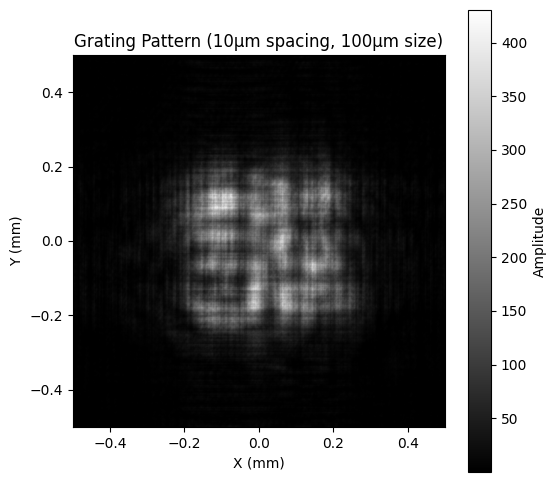

In [24]:
# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(np.abs(vals)**2, cmap="gray", extent=[-0.5, 0.5, -0.5, 0.5])
plt.colorbar(label="Amplitude")
plt.title("Grating Pattern (10µm spacing, 100µm size)")
plt.xlabel("X (mm)")
plt.ylabel("Y (mm)")
plt.show()

In [ ]:
# the function to propagate the wavefield
def angular_spectrum_propagation(U0, wvl, d, dx):
    """
    Propagates an optical field using the Angular Spectrum Method.

    Parameters:
        U0  : 2D numpy array (input wavefield)
        wvl : float (wavelength of light in meters)
        d   : float (propagation distance in meters)
        dx  : float (sampling interval in meters)

    Returns:
        U   : 2D numpy array (propagated wavefield)
    """

    # Get array size
    ny, nx = U0.shape
    k = 2 * np.pi / wvl  # Wave number

    # Create spatial frequency coordinates
    fx = np.fft.fftfreq(nx, dx)
    fy = np.fft.fftfreq(ny, dx)
    FX, FY = np.meshgrid(fx, fy)

    # Compute transfer function
    H = np.exp(1j * k * d * np.sqrt(1 - (wvl * FX) ** 2 - (wvl * FY) ** 2))
    H[np.isnan(H)] = 0  # Remove undefined values

    # Compute angular spectrum
    U0_spectrum = np.fft.fft2(U0)
    U_spectrum = U0_spectrum * H

    # Inverse FFT to obtain propagated field
    U = np.fft.ifft2(U_spectrum)

    return U

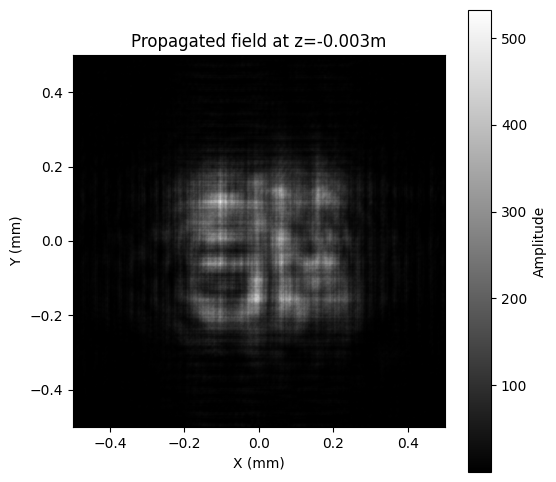

In [ ]:
# to try random values by hand

# Define parameters
dx = 1e-6  # Pixel size
wvl = 633e-9
z = -3e-3

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(np.abs(angular_spectrum_propagation(vals, wvl, z, dx))**2, cmap="gray", extent=[-0.5, 0.5, -0.5, 0.5])
plt.colorbar(label="Amplitude")
plt.title(f"Propagated field at z={z}m")
plt.xlabel("X (mm)")
plt.ylabel("Y (mm)")
plt.show()


In [ ]:
# To see the effect of the propagation distance
def angular_spectrum_propagation_range(U0, wvl, d_range, dx):
    """
    Propagates an optical field using the Angular Spectrum Method over a range of distances.

    Parameters:
        U0      : 2D numpy array (input wavefield)
        wvl     : float (wavelength of light in meters)
        d_range : list or numpy array (range of propagation distances in meters)
        dx      : float (sampling interval in meters)

    Returns:
        U_list  : list of 2D numpy arrays (propagated wavefields for each distance in d_range)
    """
    
    # Get array size
    ny, nx = U0.shape
    k = 2 * np.pi / wvl  # Wave number

    # Create spatial frequency coordinates
    fx = np.fft.fftfreq(nx, dx)
    fy = np.fft.fftfreq(ny, dx)
    FX, FY = np.meshgrid(fx, fy)
    
    # Initialize list to store results
    U_list = []
    
    # Compute angular spectrum of input field
    U0_spectrum = np.fft.fft2(U0)
    
    for d in d_range:
        # Compute transfer function for given distance d
        H = np.exp(1j * k * d * np.sqrt(1 - (wvl * FX) ** 2 - (wvl * FY) ** 2))
        H[np.isnan(H)] = 0  # Remove undefined values
        
        # Apply transfer function
        U_spectrum = U0_spectrum * H
        
        # Inverse FFT to obtain propagated field
        U = np.fft.ifft2(U_spectrum)
        U_list.append(U)
    
    return U_list


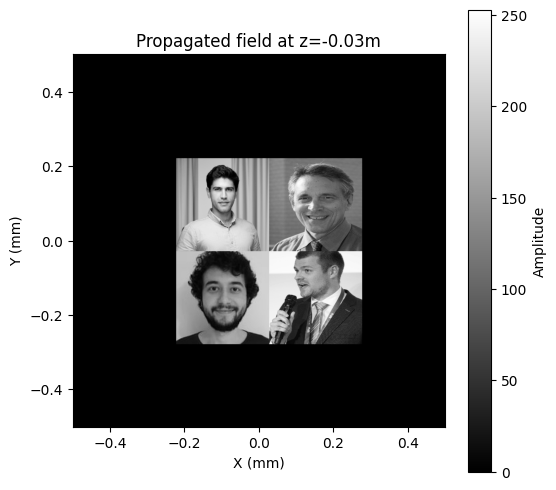

In [48]:
# The test with the value found with the ranges

dx = 1e-6  # Pixel size
wvl = 633e-9
z = -30e-3

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(np.abs(angular_spectrum_propagation(vals, wvl, z, dx))**2, cmap="gray", extent=[-0.5, 0.5, -0.5, 0.5])
plt.colorbar(label="Amplitude")
plt.title(f"Propagated field at z={z}m")
plt.xlabel("X (mm)")
plt.ylabel("Y (mm)")
plt.show()


### If we set the negative propagation distance to -30mm, we get the original handsome image

In [42]:
# the range of values, the interval was set smaller and smaller once the value was close enough
# z_distances = np.linspace(-31e-3, -28e-3, 100)
z_distances = np.linspace(-30e-3, -30e-3, 1)
grating_zs = angular_spectrum_propagation_range(vals, wvl, z_distances, dx)

array_3d = np.stack(grating_zs, axis=0)

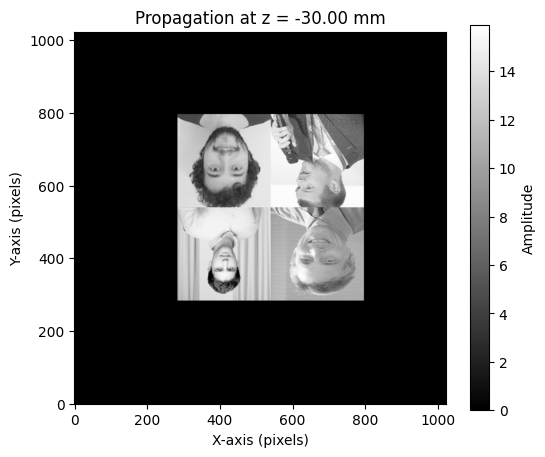

In [43]:
# to plot the ranges
for i, image in enumerate(grating_zs):
    plt.figure(figsize=(6, 5))
    plt.imshow(np.abs(image), cmap='gray', origin='lower')
    plt.title(f'Propagation at z = {z_distances[i]*1e3:.2f} mm')
    plt.xlabel('X-axis (pixels)')
    plt.ylabel('Y-axis (pixels)')
    plt.colorbar(label='Amplitude')
    plt.show()

# 2

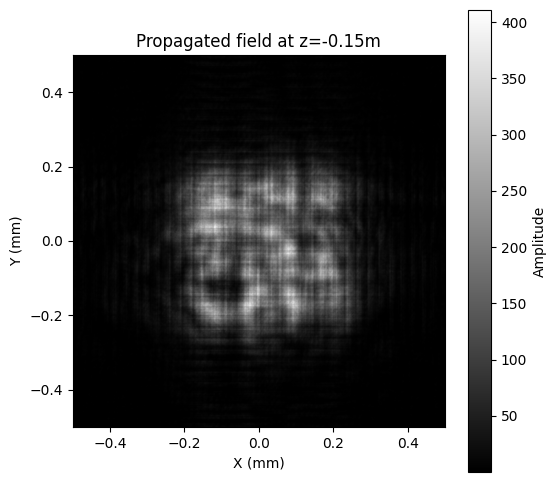

In [66]:

factor = 5

# Define parameters
dx = 1e-6 * factor  # Pixel size
wvl = 633e-9
z = -30e-3 * factor

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(np.abs(angular_spectrum_propagation(vals, wvl, z, dx))**2, cmap="gray", extent=[-0.5, 0.5, -0.5, 0.5])
plt.colorbar(label="Amplitude")
plt.title(f"Propagated field at z={z}m")
plt.xlabel("X (mm)")
plt.ylabel("Y (mm)")
plt.show()


If we increase the pixel size and the propagation distance by a factor 10, we get a blurry image. This happens because the resolution becomes too small to encapsulate the fine details of the image.
To make it work again we would have to increase the number of pixels in the image from 01_unknown.npy, we would then have a sufficient enough resolution to be able to scale by a factor 10